In [1]:
import pandas as pd
df=pd.read_csv(r'https://raw.githubusercontent.com/skkhandai22/Data-Prediction/main/COVID-19%20Cases(10-12-2020).csv')
df

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,1,12/03/2020,India,74,71,3.0,0.0
1,2,13/03/2020,India,75,71,3.0,1.0
2,3,14/03/2020,India,84,72,10.0,2.0
3,4,15/03/2020,India,107,95,10.0,2.0
4,5,16/03/2020,India,114,99,13.0,2.0
...,...,...,...,...,...,...,...
9878,9879,03/12/2020,World,63965092,62476972,NaN,1488120.0
9879,9880,06/12/2020,World,65870030,64346447,NaN,1523583.0
9880,9881,07/12/2020,World,66422058,64889640,NaN,1532418.0
9881,9882,08/12/2020,World,67210778,65670001,NaN,1540777.0


In [2]:
india=df[df["Region"]=="India"]
index_names=df[df["Region"]=="India"].index
df.drop(index_names,inplace=True)


In [3]:
world=df[df["Region"]=="World"]
index_names=df[df["Region"]=="World"].index
df.drop(index_names,inplace=True)


In [4]:
df[df["Death"]==df["Death"].max()]

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
5685,5686,10/12/2020,Maharashtra,1864348,74315,1742131.0,47902.0


In [5]:
current=df[df["Date"]=="10/12/2020"]
current[current["Active Cases"]==current["Active Cases"].max()]


,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
5685,5686,10/12/2020,Maharashtra,1864348,74315,1742131.0,47902.0


In [6]:
india[india["Active Cases"]==india["Active Cases"].max()]

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
190,191,18/09/2020,India,5214677,1017754,4112551.0,84372.0


In [7]:
current[current["Cured/Discharged"]==current["Cured/Discharged"].max()]

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
5685,5686,10/12/2020,Maharashtra,1864348,74315,1742131.0,47902.0


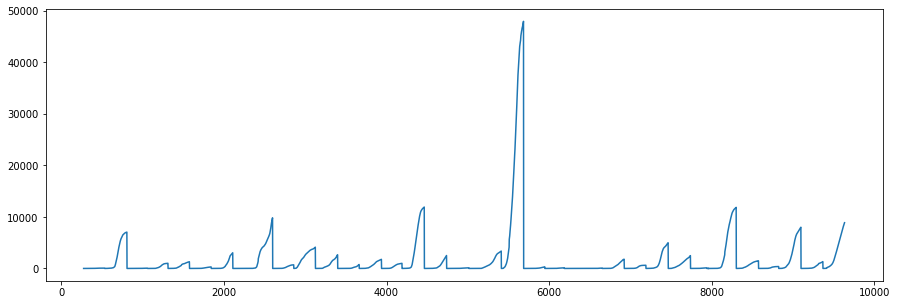

In [8]:
df.Death.plot(figsize=(15,5))

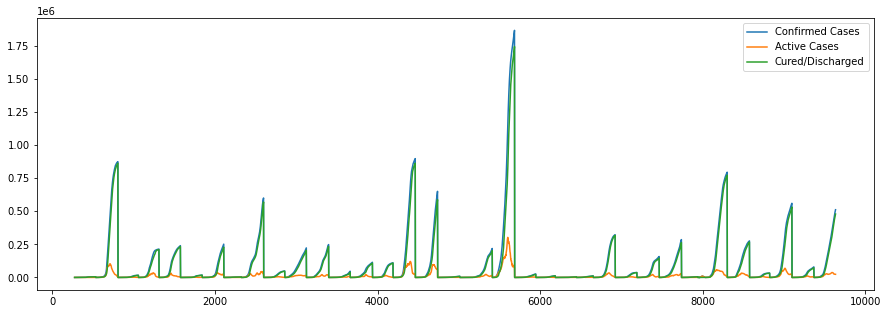

In [9]:
df.plot(y = ['Confirmed Cases','Active Cases','Cured/Discharged'],figsize=(15,5))

In [19]:
!pip install bar_chart_race &> /dev/null

In [20]:
!pip install ipython-autotime

In [21]:
%load_ext autotime
import bar_chart_race as bcr

time: 7.05 ms


In [23]:
bcr.bar_chart_race(df=india,n_bars=5,filter_column_colors=True,title='Covid 19')

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:figure size in inches has been adjusted from 6.789930555555555 x 3.5 to 6.777777777777778 x 3.5
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 976x504 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmp6s5k24ks/temp.m4v


Exception: ignored

time: 404 ms


In [10]:
df_new=india[["Date","Active Cases"]]

In [11]:
df_new

,Date,Active Cases
0,12/03/2020,71
1,13/03/2020,71
2,14/03/2020,72
3,15/03/2020,95
4,16/03/2020,99
...,...,...
269,06/12/2020,403248
270,07/12/2020,396729
271,08/12/2020,383866
272,09/12/2020,378909


In [12]:
df_new = df_new.rename(columns = {'Date':'ds','Active Cases':'y'})

In [13]:
df_new.to_csv('Covid=.csv',index=False)

In [14]:
import fbprophet
ot=fbprophet.Prophet(changepoint_prior_scale=0.5)
ot.fit(df_new)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
forecast=ot.make_future_dataframe(periods=12,freq='M')
forecast=ot.predict(forecast)

In [16]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [17]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-04,3.695680e+05,3.027084e+04,702053.421210
1,2020-01-05,3.884122e+05,8.769187e+04,730576.372863
2,2020-01-06,3.983584e+05,7.272360e+04,747185.660666
3,2020-01-07,3.979197e+05,6.945779e+04,691830.451503
4,2020-01-08,3.964115e+05,7.092289e+04,720558.682970
...,...,...,...,...
281,2021-07-31,-7.094763e+05,-1.462332e+06,-1827.564840
282,2021-08-31,-8.161393e+05,-1.676748e+06,16178.244983
283,2021-09-30,-9.481582e+05,-2.014874e+06,42043.426975
284,2021-10-31,-1.112704e+06,-2.264517e+06,-78996.378853


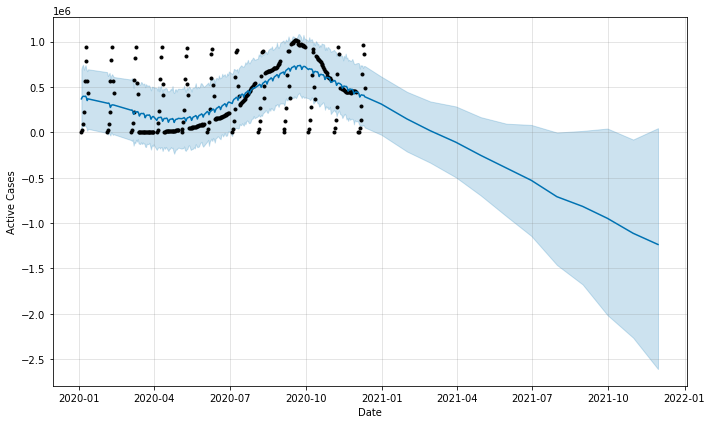

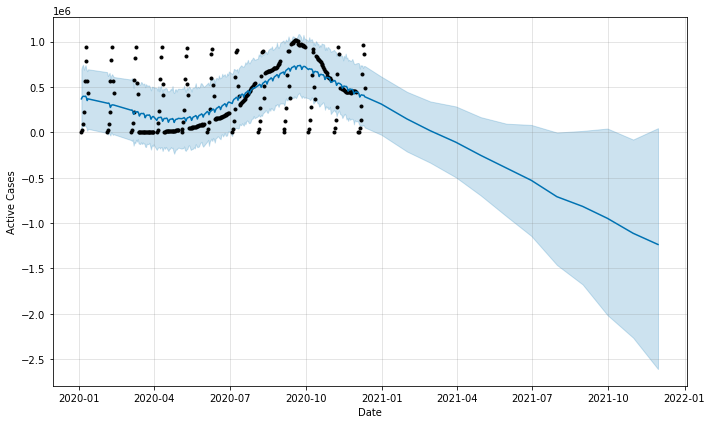

In [18]:
ot.plot(forecast,xlabel='Date',ylabel='Active Cases')